In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

import context
from ccn import Constraint, ConstraintsGroup
from shapes import Rectangle
from experiment import Experiment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### Define the shapes

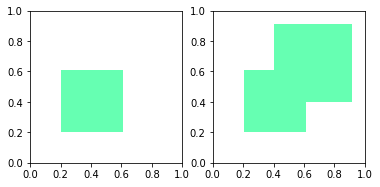

In [2]:
rect0 = Rectangle(0.2, 0.6, 0.2, 0.6)
rect1 = Rectangle(0.4, 0.9, 0.4, 0.9)
combined = rect0 | rect1
shapes = [rect0, combined]

fig, ax = plt.subplots(1, len(shapes))
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()

constraints1 = [ConstraintsGroup([Constraint('1 :- 0')])]
constraints2 = [ConstraintsGroup([Constraint('n0 :- n1')])]

### Define the neural network

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model1 = NeuralNetwork()
model2 = NeuralNetwork()
print(model1)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=2, bias=True)
    (3): Sigmoid()
  )
)


### Train and test the model

In [4]:
experiment = Experiment('rectangles', model1, shapes, constraints1)
experiment.run(50, device)
#experiment.save(dir='./models/')

Epoch 1
-------------------------------


RuntimeError: CUDA error: CUBLAS_STATUS_INTERNAL_ERROR when calling `cublasCreate(handle)`

Epoch 1
-------------------------------
loss: 0.678262 [    0/10000]
loss: 0.613378 [ 6400/10000]
Test Error: 
 Accuracy: 82.7%, 59.5%
 Avg loss: 0.008780 

Epoch 2
-------------------------------
loss: 0.591301 [    0/10000]
loss: 0.563372 [ 6400/10000]
Test Error: 
 Accuracy: 82.7%, 62.1%
 Avg loss: 0.008204 

Epoch 3
-------------------------------
loss: 0.541532 [    0/10000]
loss: 0.557804 [ 6400/10000]
Test Error: 
 Accuracy: 82.7%, 62.1%
 Avg loss: 0.008120 

Epoch 4
-------------------------------
loss: 0.531792 [    0/10000]
loss: 0.555115 [ 6400/10000]
Test Error: 
 Accuracy: 82.7%, 61.7%
 Avg loss: 0.008089 

Epoch 5
-------------------------------
loss: 0.529028 [    0/10000]
loss: 0.552870 [ 6400/10000]
Test Error: 
 Accuracy: 82.7%, 61.7%
 Avg loss: 0.008075 

Epoch 6
-------------------------------
loss: 0.526700 [    0/10000]
loss: 0.550498 [ 6400/10000]
Test Error: 
 Accuracy: 82.7%, 61.1%
 Avg loss: 0.008064 

Epoch 7
-------------------------------
loss: 0.526398 [  

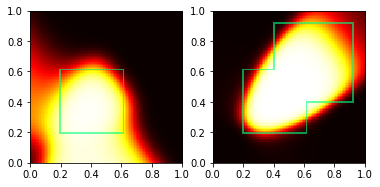

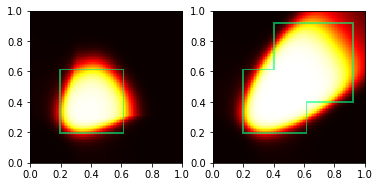

In [5]:
experiment = Experiment('rectangles-rev', model2, shapes, constraints2)
experiment.run(50, 'cpu')
#experiment.save(dir='./models/')